In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
#데이터 불러오기
data=pd.read_csv("C:\\Users\\Jeong SeungJu\\OneDrive\\바탕 화면\\healthcare-dataset-stroke-data.csv",header=0)

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data2=data.copy()

In [6]:
data2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#데이터 칼럼(속성)
data.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#결측 처리
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data=data.dropna()

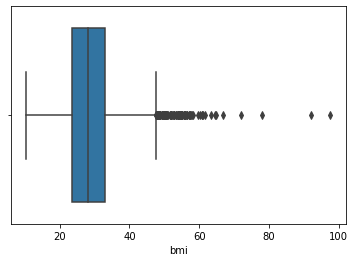

In [10]:
#이상값 검출,제거
sns.boxplot(data['bmi'])

In [11]:
out=data['bmi'].quantile(0.75)+(data['bmi'].quantile(0.75)-data['bmi'].quantile(0.25))*1.5

In [12]:
data[data['bmi']>out].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 21 to 5057
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 110 non-null    int64  
 1   gender             110 non-null    object 
 2   age                110 non-null    float64
 3   hypertension       110 non-null    int64  
 4   heart_disease      110 non-null    int64  
 5   ever_married       110 non-null    object 
 6   work_type          110 non-null    object 
 7   Residence_type     110 non-null    object 
 8   avg_glucose_level  110 non-null    float64
 9   bmi                110 non-null    float64
 10  smoking_status     110 non-null    object 
 11  stroke             110 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 11.2+ KB


In [13]:
data3=data3=data[(data['bmi']<=out)&(data['gender']!='Other')]

In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4798 non-null   int64  
 1   gender             4798 non-null   object 
 2   age                4798 non-null   float64
 3   hypertension       4798 non-null   int64  
 4   heart_disease      4798 non-null   int64  
 5   ever_married       4798 non-null   object 
 6   work_type          4798 non-null   object 
 7   Residence_type     4798 non-null   object 
 8   avg_glucose_level  4798 non-null   float64
 9   bmi                4798 non-null   float64
 10  smoking_status     4798 non-null   object 
 11  stroke             4798 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 487.3+ KB


In [15]:
#각 컬럼(속성)별 EDA
def count(x):
    a=sns.countplot(x=x,data=data3
                   ,order=data3[x].value_counts().index)
    b=plt.xlabel(x)
    c=data3[x].value_counts()
    return a,b,c

(<matplotlib.axes._subplots.AxesSubplot at 0x1d1181a7880>,
 Text(0.5, 0, 'gender'),
 Female    2812
 Male      1986
 Name: gender, dtype: int64)

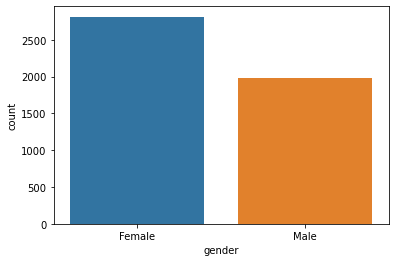

In [16]:
count('gender')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d118264730>,
 Text(0.5, 0, 'age'),
 78.00    93
 57.00    89
 54.00    82
 55.00    82
 51.00    81
          ..
 1.40      3
 0.16      3
 0.08      2
 0.48      2
 0.40      2
 Name: age, Length: 104, dtype: int64)

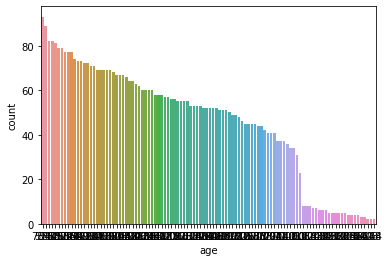

In [17]:
count('age')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d118334be0>,
 Text(0.5, 0, 'hypertension'),
 0    4368
 1     430
 Name: hypertension, dtype: int64)

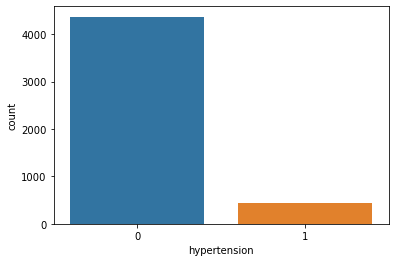

In [18]:
count('hypertension')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d1184d8c70>,
 Text(0.5, 0, 'heart_disease'),
 0    4556
 1     242
 Name: heart_disease, dtype: int64)

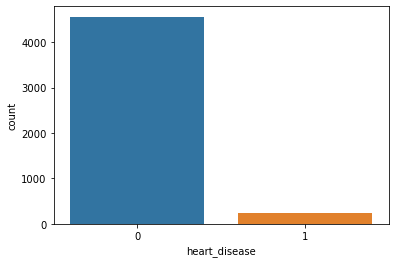

In [19]:
count('heart_disease')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d11851e910>,
 Text(0.5, 0, 'ever_married'),
 Yes    3119
 No     1679
 Name: ever_married, dtype: int64)

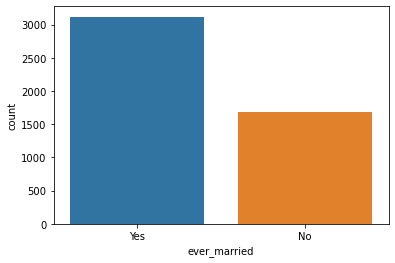

In [20]:
count('ever_married')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d118509dc0>,
 Text(0.5, 0, 'work_type'),
 Private          2733
 Self-employed     759
 children          671
 Govt_job          613
 Never_worked       22
 Name: work_type, dtype: int64)

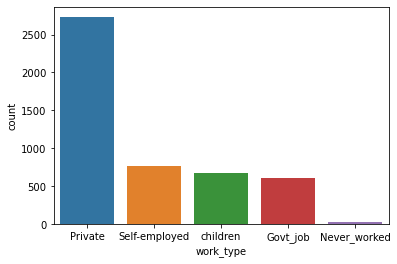

In [21]:
count('work_type')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d1185c01f0>,
 Text(0.5, 0, 'Residence_type'),
 Urban    2441
 Rural    2357
 Name: Residence_type, dtype: int64)

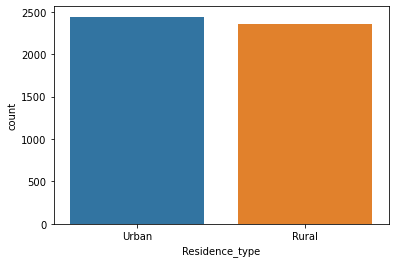

In [22]:
count('Residence_type')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d118605eb0>,
 Text(0.5, 0, 'smoking_status'),
 never smoked       1804
 Unknown            1459
 formerly smoked     814
 smokes              721
 Name: smoking_status, dtype: int64)

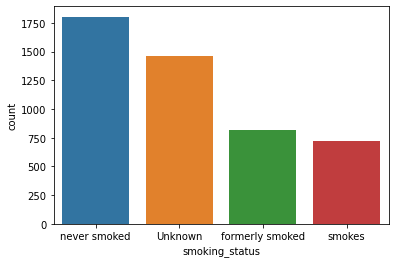

In [23]:
count('smoking_status')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d118661be0>,
 Text(0.5, 0, 'stroke'),
 0    4591
 1     207
 Name: stroke, dtype: int64)

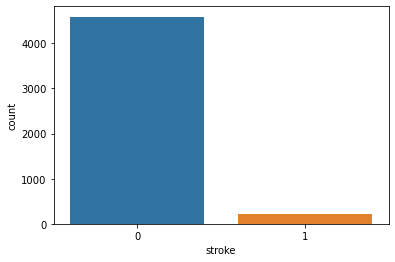

In [24]:
count('stroke')

In [25]:
def age_cat(y):
    div=''
    if y<20:
        div=1
    elif y<30:
        div=2
    elif y<40:
        div=3
    elif y<50:
        div=4
    elif y<60:
        div=5
    else:
        div=6
    return div
        

In [26]:
data3['age_div']=data3['age'].apply(lambda x:age_cat(x))

<ipython-input-26-48d567e4f61c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['age_div']=data3['age'].apply(lambda x:age_cat(x))


(<matplotlib.axes._subplots.AxesSubplot at 0x1d11844aaf0>,
 Text(0.5, 0, 'age_div'),
 6    1273
 1     940
 5     774
 4     676
 3     609
 2     526
 Name: age_div, dtype: int64)

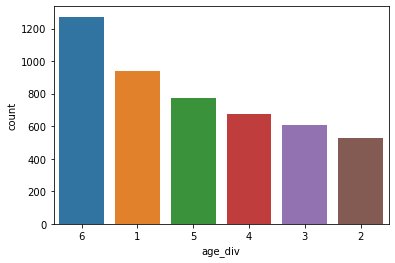

In [27]:
count('age_div')

In [28]:
gender_dict={'Male':0,'Female':1}
data3['gender']=data3['gender'].map(gender_dict)

<ipython-input-28-4f0f4685b326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['gender']=data3['gender'].map(gender_dict)


In [29]:
marry_dict={'No':0,'Yes':1}
data3['ever_married']=data3['ever_married'].map(marry_dict)

<ipython-input-29-da8b1bb90b56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['ever_married']=data3['ever_married'].map(marry_dict)


In [30]:
work_type_dict={'children':0,'Govt_job':1,'Never_worked':2,'Private':3,'Self-employed':4}
data3['work_type']=data3['work_type'].map(work_type_dict)

<ipython-input-30-d087d6f5e907>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['work_type']=data3['work_type'].map(work_type_dict)


In [31]:
Residence_type_dict={'Urban':0,'Rural':1}
data3['Residence_type']=data3['Residence_type'].map(Residence_type_dict)

<ipython-input-31-c6f82b5b4cef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Residence_type']=data3['Residence_type'].map(Residence_type_dict)


In [32]:
smoking_dict={'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3}
data3['smoking_status']=data3['smoking_status'].map(smoking_dict)

<ipython-input-32-a8ae520b3409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['smoking_status']=data3['smoking_status'].map(smoking_dict)


In [33]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4798 non-null   int64  
 1   gender             4798 non-null   int64  
 2   age                4798 non-null   float64
 3   hypertension       4798 non-null   int64  
 4   heart_disease      4798 non-null   int64  
 5   ever_married       4798 non-null   int64  
 6   work_type          4798 non-null   int64  
 7   Residence_type     4798 non-null   int64  
 8   avg_glucose_level  4798 non-null   float64
 9   bmi                4798 non-null   float64
 10  smoking_status     4798 non-null   int64  
 11  stroke             4798 non-null   int64  
 12  age_div            4798 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 684.8 KB


In [34]:
#상관분석
corrMatt=data3[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']]
corr=corrMatt.corr()

In [35]:
corr

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.022242,-0.082817,0.034623,0.072692,-0.004558,-0.054939,0.004140,-0.039057,-0.006910
hypertension,-0.022242,1.000000,0.121069,0.164419,0.122438,-0.000344,0.175053,0.158593,-0.131243,0.145261
heart_disease,-0.082817,0.121069,1.000000,0.113187,0.094004,0.004036,0.160573,0.064043,-0.072898,0.138553
ever_married,0.034623,0.164419,0.113187,1.000000,0.431165,-0.003669,0.148121,0.379312,-0.316686,0.106326
work_type,0.072692,0.122438,0.094004,0.431165,1.000000,-0.000615,0.091888,0.374116,-0.349056,0.080355
Residence_type,-0.004558,-0.000344,0.004036,-0.003669,-0.000615,1.000000,0.001634,-0.012050,-0.002588,-0.005516
avg_glucose_level,-0.054939,0.175053,0.160573,0.148121,0.091888,0.001634,1.000000,0.182605,-0.109303,0.138395
bmi,0.004140,0.158593,0.064043,0.379312,0.374116,-0.012050,0.182605,1.000000,-0.264660,0.060257
smoking_status,-0.039057,-0.131243,-0.072898,-0.316686,-0.349056,-0.002588,-0.109303,-0.264660,1.000000,-0.077008
stroke,-0.006910,0.145261,0.138553,0.106326,0.080355,-0.005516,0.138395,0.060257,-0.077008,1.000000


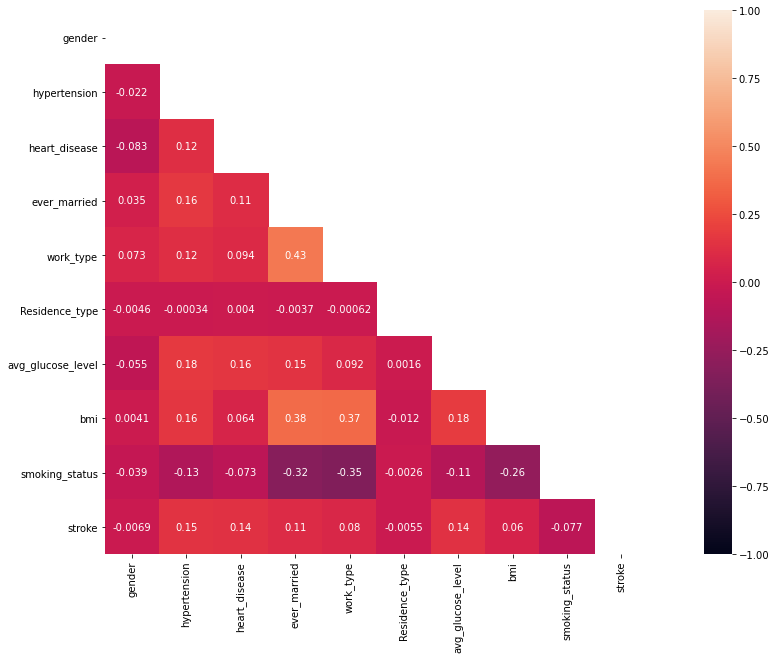

In [36]:
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

figure, ax=plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

In [55]:
#데이터 모델링, 예측
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [56]:
x_data=data3.iloc[:,4:6]
y_data=data3.iloc[:,-1]
x_val=x_data.values
y_val=y_data.values

In [57]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,test_size=0.3)

In [58]:
estimator=LogisticRegression().fit(x_train,y_train)

In [59]:
y_predict=estimator.predict(x_train)
score=metrics.accuracy_score(y_train,y_predict)
score

0.44282310899344846

In [60]:
y_predict = estimator.predict(x_test)
score=metrics.accuracy_score(y_test,y_predict)
score

0.44513888888888886

In [61]:
confmat=pd.DataFrame(confusion_matrix(y_test,y_predict),index=['True[0]','True[1]'],
                    columns=['Predict[0]','Predict[1]'])

ValueError: Shape of passed values is (6, 6), indices imply (2, 2)